<a href="https://colab.research.google.com/github/Pedrf12/AppleProducts/blob/main/AppleProducts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install scipy==1.7.3

# Import Data 

Connect to kaggles

In [2]:
"""
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Datasets/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
"""

'\n!pip install -q kaggle\n!mkdir -p ~/.kaggle\n!cp /content/drive/MyDrive/Datasets/kaggle.json ~/.kaggle/\n!ls ~/.kaggle\n!chmod 600 /root/.kaggle/kaggle.json\n'

Download the data

In [3]:
""" 
!kaggle datasets download -d prasertk/apple-product-price-list-from-26-countries-2022
"""

' \n!kaggle datasets download -d prasertk/apple-product-price-list-from-26-countries-2022\n'

Save as DataFrame

In [4]:
from zipfile import ZipFile
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
 
# read the dataset using the compression zip
"""
with ZipFile('/content/drive/MyDrive/Datasets/AppleProducts/apple-product-price-list-from-26-countries-2022.zip', 'r') as zipObj:
   zipObj.extractall()
"""

apple_product = pd.read_csv("/content/drive/MyDrive/Datasets/AppleProducts/apple product price list from 26 countries.csv")
exchange_rate = pd.read_csv("/content/drive/MyDrive/Datasets/AppleProducts/exchange rate.csv")
country_income = pd.read_csv("/content/drive/MyDrive/Datasets/AppleProducts/Country_income.csv")

In [5]:
apple_product.head()

,pid,model,price,country_code,country,region,income group,scraped_date
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535


In [6]:
country_income.loc[country_income.country=="France","MedianIncome" ] = 3883
country_income

,country,MedianIncome
0,Australia,7391
1,Austria,3790
2,Brazil,8220
3,Canada,9333
4,Czech Republic,58500
5,Denmark,39800
6,Finland,4320
7,France,3883
8,Germany,4120
9,Hungary,523000


This is a dataframe of all 25 countries  median monthly income. The values are in their own currency. 

The reason for chosing median is simple; Vilfredo Pareto observed the, still present concentration of of high income in a very small fraction of the population. 

This makes the normally used mean or average a misleading central tendency metric, because very high wages made by a small percentage increase the mean far from the reality. 

This will allow us to constract a way to compare the price from country to country. Instead of a monetory value, price of an apple prodcuct can be seen as a months work. Thus substituiting the question of  what is the price for a easier one : how many months of work 

In [7]:
exchange_rate

,Date,Currency CodeA,X
0,2022-01-04,AUD,1.386190
1,2022-01-04,EUR,0.884600
2,2022-01-04,BRL,5.660700
3,2022-01-04,CAD,1.274400
4,2022-01-04,CZK,21.944000
5,2022-01-04,DKK,6.583500
6,2022-01-04,HUF,323.589996
7,2022-01-04,INR,74.508003
8,2022-01-04,MXN,20.547001
9,2022-01-04,NOK,8.868320


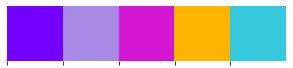

In [8]:
# Color Palette
custom_colors = ['#7400ff', '#a788e4', '#d216d2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

# set size 

sns.set(rc= {"figure.figsize": (8, 8)})


# Preparation of data 

* Extrac price from `price` column , then multiply by `x` (*exchange rate*) to get value in USD dollars
* Not interest in `scraped_date`. If there are repeated values I'll calculate the mean. Range is 3 days , so I won't be doing any timeseies analysis. 
* Eliminate currency codes columns.
* Merge with to get currency rate and Median Monthly Income

## Transformations first 

Make sure there is a unique key to merge on.


In [9]:
apple_product.groupby(["country_code","country"]).agg({"model":"count"})

,,model
country_code,country,
at,Austria,18
au,Australia,17
br,Brazil,16
ca,Canada,17
cz,Czech Republic,17
de,Germany,17
dk,Denmark,17
es,Spain,18
fi,Finland,17


In [10]:
map = {'au' : "AUD", 'at':"EUR", 'br':"BRL", 'ca':"CAD", 'cz':"CZK", 'de':"EUR", 'dk':"DKK", 'es':"EUR", 'fi':"EUR", 'fr':"EUR", 'hu':"HUF",
       'in':"INR", 'ie':"EUR", 'it':"EUR", 'lu':"EUR", 'mx':"MXN", 'nl':"EUR", 'no':"NOK", 'ph':"PHP", 'pl':"PLN", 'pt':"EUR", 'ru':"RUB",
       'se':"SEK", 'th':"THB", 'tr':"TRY", 'us':"USD"}
    


apple_product["contry_codeA"] = apple_product.country_code.replace(map)


In [11]:
apple_product["contry_codeA"].unique() == exchange_rate["Currency CodeA"].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False])

In [12]:
apple_product["contry_codeA"].unique()


array(['AUD', 'EUR', 'BRL', 'CAD', 'CZK', 'DKK', 'HUF', 'INR', 'MXN',
       'NOK', 'PHP', 'PLN', 'RUB', 'SEK', 'THB', 'TRY', 'USD'],
      dtype=object)

In [13]:
exchange_rate["Currency CodeA"].unique()

array(['AUD', 'EUR', 'BRL', 'CAD', 'CZK', 'DKK', 'HUF', 'INR', 'MXN',
       'NOK', 'PHP', 'PLN', 'RUB', 'SEK', 'THB', 'USD', 'TRY'],
      dtype=object)

## Merge 

In [14]:
# apple_product and exchange_rate
df = apple_product.merge(exchange_rate.iloc[:,1:],left_on = "contry_codeA", right_on ="Currency CodeA", how = "left" )
assert(sum(df.contry_codeA==df["Currency CodeA"])== len(df))

In [15]:
# add countries income
df= df.merge(country_income, on= "country", how= "left")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pid             448 non-null    int64  
 1   model           448 non-null    object 
 2   price           448 non-null    object 
 3   country_code    448 non-null    object 
 4   country         448 non-null    object 
 5   region          448 non-null    object 
 6   income group    448 non-null    object 
 7   scraped_date    448 non-null    object 
 8   contry_codeA    448 non-null    object 
 9   Currency CodeA  448 non-null    object 
 10  X               448 non-null    float64
 11  MedianIncome    448 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 45.5+ KB


## Get the models prices

Author of code :  [Prasert Kanawattanachai](https://www.kaggle.com/prasertk)

In : [Clean Apple product price lists across countries](https://www.kaggle.com/prasertk/clean-apple-product-price-lists-across-countries)


In [17]:
# credit: https://stackoverflow.com/questions/43211380/is-there-a-list-of-locale-codes-of-countries-that-use-commas-instead-of-decimal
df['price2']=df['price'].str.split('or', 1, expand=True)[0]
df['price2']=df['price2'].str.replace('[^\d\.\,]', '', regex=True)


comma_decimal_point_locale = ['AM', 'AR', 'AT', 'AZ', 'BA', 'BE', 'BG', 'BO', 'BR', 'BY',
                    'CA', 'CH', 'CL', 'CM', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK',
                    'EC', 'EE', 'ES', 'FI', 'FO', 'FR', 'GE', 'GL',  'HR', 'HU',
                    'ID', 'IS', 'IT', 'KZ', 'LB', 'LT', 'LU', 'LV', 'MA', 'MD', 'MK', 'MO', 'MZ',
                    'NL', 'NO', 'PE', 'PL', 'PT', 'PY', 'RO', 'RS', 'RU',
                    'SE', 'SI', 'SK', 'TN', 'TR', 'UA', 'UY', 'UZ', 'VE', 'VN', 'ZA']

price_clean=[]
for i, r in df.iterrows():
    p=r['price2']
    if r['country_code'] in comma_decimal_point_locale:
        p=p.replace('.', '').replace(',', '.')
    else:
        p=p.replace(',', '')
    price_clean.append(p)

df['price_local_currency']=price_clean
df['price_local_currency']=pd.to_numeric(df['price_local_currency'], errors="coerce")
#df

In [18]:
# based on that I've made price_usd_3

df["price3"] = df.price2.str.replace(".","")
a= df.country.isin(["Germany", "Luxembourg", "Netherlands"])
b= df.price3.str.contains(",")
df.loc[ (a & b), "price3"] = df.loc[ (a & b), "price3"].str.replace(",",".")


price_clean_3=[]
for i, r in df.iterrows():
    p=r['price3']
    if r['country_code'] in comma_decimal_point_locale:
        p=p.replace('.', '').replace(',', '.')
    else:
        p=p.replace(',', '')
    price_clean_3.append(p)
    


df['price_local_currency_3']=price_clean_3
df['price_local_currency_3']=pd.to_numeric(df['price_local_currency_3'], errors="coerce")
df.loc[df.country == "India" ,   'price_local_currency_3']= df.loc[df.country == "India" ,'price_local_currency_3'] /100
df.loc[ (df.country == "United States") & (df.price_local_currency_3 >10000), "price_local_currency_3"] = df.loc[ (df.country == "United States") & (df.price_local_currency_3 >10000), "price_local_currency_3"]/100 

df["price_usd"] = df.price_local_currency * (1/df.X)  
df["price_usd_3"] = df.price_local_currency_3 * (1/df.X)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 447
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pid                     448 non-null    int64  
 1   model                   448 non-null    object 
 2   price                   448 non-null    object 
 3   country_code            448 non-null    object 
 4   country                 448 non-null    object 
 5   region                  448 non-null    object 
 6   income group            448 non-null    object 
 7   scraped_date            448 non-null    object 
 8   contry_codeA            448 non-null    object 
 9   Currency CodeA          448 non-null    object 
 10  X                       448 non-null    float64
 11  MedianIncome            448 non-null    int64  
 12  price2                  448 non-null    object 
 13  price_local_currency    428 non-null    float64
 14  price3                  448 non-null    ob

## Names of models to english

Author of code :  [Prasert Kanawattanachai](https://www.kaggle.com/prasertk)

In : [Clean Apple product price lists across countries](https://www.kaggle.com/prasertk/clean-apple-product-price-lists-across-countries)


In [20]:
df['model_en']=df['model']
for i, r in df.iterrows():
    if 'imac' in r['model'].lower():
        df.loc[i, 'model_en']='24-inch iMac'
    elif 'pen' in r['model'].lower():
        df.loc[i, 'model_en']='Apple Pencil (2nd generation)'
    elif re.findall('(spor|Спортивный ремешок|Correa deportiva|Urheiluranneke)', r['model'], flags=re.IGNORECASE):
        df.loc[i, 'model_en']='Sport Band'
    elif re.findall('(airpods\(2|airpods\(andra|airpods\(รุ่นที่ 2|airpods\(seconda|airpods\(segunda)', r['model'], flags=re.IGNORECASE): # 'airpods(2' in r['model'].lower():
        df.loc[i, 'model_en']='AirPods(2nd generation)'
    elif re.findall('(airpods\(3|airpods\(รุ่นที่ 3|airpods\(tre|airpods\(ter)', r['model'], flags=re.IGNORECASE): # 'airpods(2' in r['model'].lower():
        df.loc[i, 'model_en']='AirPods(3rd generation)'
    elif 'mouse' in r['model'].lower():
        df.loc[i, 'model_en']='Magic Mouse'


In [21]:
categories = ["model_en", "country_code", "country", "region", "income group", "Currency CodeA"]
df[categories].describe()

,model_en,country_code,country,region,income group,Currency CodeA
count,448,448,448,448,448,448
unique,24,26,26,5,3,17
top,iPad,tr,Spain,Europe & Central Asia,High income,EUR
freq,26,18,18,311,326,173


## Clean median income and add Daily Income and ajusted price

In [22]:
df["MedianIncome"] = pd.to_numeric(df["MedianIncome"]) * (1/df.X)
df["DailyIncome"] = df["MedianIncome"] / 30  

In [23]:
df["ajusted_price"] = round((df.price_usd_3 /df.MedianIncome )*100,2)
df["ajusted_price_daily"] = round((df.price_usd_3 /df.DailyIncome ),2)

In [24]:
cols = ['pid','country', 'region','income group','X','price3', 'price_usd_3', 'model_en',
       'MedianIncome', 'ajusted_price','ajusted_price_daily']
df = df[cols]

In [25]:

df.isna().sum()

pid                    0
country                0
region                 0
income group           0
X                      0
price3                 0
price_usd_3            5
model_en               0
MedianIncome           0
ajusted_price          5
ajusted_price_daily    5
dtype: int64

In [26]:
df[df.ajusted_price.isna()]

,pid,country,region,income group,X,price3,price_usd_3,model_en,MedianIncome,ajusted_price,ajusted_price_daily
127,8,Spain,Europe & Central Asia,High income,0.884600,,NaN,Tarjeta regalo del Apple Store,3074.836141,NaN,NaN
231,8,Italy,Europe & Central Asia,High income,0.884600,,NaN,Carta regalo Apple Store,4205.290604,NaN,NaN
266,8,Mexico,Latin America & Caribbean,Upper middle income,20.547001,,NaN,Tarjetas App Store & iTunes,1586.606248,NaN,NaN
369,8,Russia,Europe & Central Asia,Upper middle income,74.908798,,NaN,Подарочные карты iTunes,1468.452340,NaN,NaN
421,8,Turkey,Europe & Central Asia,Upper middle income,13.440000,,NaN,App Store ve iTunes Hediye Kartı satın alın,582.589286,NaN,NaN


In [27]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Validate

In [28]:

categories = ['model_en','country', 'region','income group']
numerical = [ 'X','price_usd_3', 'MedianIncome', 'ajusted_price','ajusted_price_daily']

In [29]:
df.groupby(["country"]).pid.count()

country
Australia         17
Austria           18
Brazil            16
Canada            17
Czech Republic    17
Denmark           17
Finland           17
France            17
Germany           17
Hungary           17
India             18
Ireland           17
Italy             17
Luxembourg        17
Mexico            17
Netherlands       17
Norway            17
Philippines       17
Poland            17
Portugal          17
Russia            17
Spain             17
Sweden            17
Thailand          17
Turkey            17
United States     17
Name: pid, dtype: int64

In [30]:
len(df.model_en.unique())

19

In [31]:
temp = df.groupby(["model_en"]).agg({'pid':'count','price_usd_3':'mean','ajusted_price':'mean','ajusted_price_daily':'mean'}).query('pid <26')
temp

,pid,price_usd_3,ajusted_price,ajusted_price_daily
model_en,,,,
AirPods Max,11,684.306617,34.607273,10.381818
AirPods(3rd generation),25,219.700176,10.614000,3.184000
Apple TV HD,17,194.547954,12.111765,3.634118
iPhone 13,21,902.993412,39.662381,11.898095
iPhone 13 Pro,5,1370.820210,103.958000,31.188000


There are 19 different products. 

Most countries have 17 models. Brazil 16 , Austria and India 18. 

The above 5 products are not shown in every country.



# Viz data in Table

In [32]:
#@title Group and sort the average values


Sort = "price_usd_3" #@param ["price_usd_3", "MedianIncome", "ajusted_price","ajusted_price_daily"]
Group = "country" #@param ["country", "region", "income group"]


d= {"price_usd_3":'Average price (US $)', "ajusted_price" :'Average Ajusted Price (%)','ajusted_price_daily': "Average work days needed to buy" }
df.groupby(Group)[["price_usd_3",	"MedianIncome"	,"ajusted_price","ajusted_price_daily"]].mean().sort_values(by = Sort, ascending = False).rename(columns = d)


,Average price (US $),MedianIncome,Average Ajusted Price (%),Average work days needed to buy
country,,,,
Brazil,882.002250,1452.117269,60.738750,18.221875
Italy,572.874424,4205.290604,13.624118,4.087059
Spain,559.574959,3074.836141,18.198235,5.458824
Mexico,551.055089,1586.606248,34.730588,10.420000
Ireland,546.275495,3626.497919,15.063529,4.518824
France,538.295817,4389.554682,12.262941,3.679412
Russia,538.026802,1468.452340,36.638824,10.992353
Germany,533.222071,4657.472390,11.448824,3.434118
Sweden,530.642226,4664.759031,11.375882,3.412353


In [33]:
#@title
data = df.copy()
data["price_usd_3"] = data.price_usd_3.astype('int')

pivot = data.pivot_table( columns= "model_en",index = "country", values = "price_usd_3" , aggfunc="max")
cols = ['24-inch iMac', 'AirPods Pro', 'AirPods(2nd generation)',
       'AirPods(3rd generation)', 'Apple Pencil (2nd generation)',
       'Apple TV 4K', 'Apple TV HD', 'Apple Watch SE', 'Apple Watch Series 3',
       'MacBook Air', 'Magic Mouse', 'Sport Band', 'iPad', 'iPad Pro',
       'iPhone 12', 'iPhone 13',  'iPhone SE']
pivot = pivot[cols]

HighIncome =df[df["income group"]== "High income"].country.unique()
LowerIncome =df[df["income group"]== "Upper middle income"].country.unique()
UpperMiddleIncome =df[df["income group"]== "Lower middle income"].country.unique()
labels =  ['24-inch iMac', 'AirPods Pro', 'AirPods',
       'AirPods', 'Apple Pencil ',
       'Apple TV 4K', 'Apple TV HD', 'Apple Watch SE', 'Apple Watch 3',
       'MacBook Air', 'Magic Mouse', 'Sport Band', 'iPad', 'iPad Pro',
       'iPhone 12', 'iPhone 13',  'iPhone SE']

sns.set(rc= {"figure.figsize": (15, 10)})

In [34]:
#@title Show prices per country  (Depricated)

"""
IncomeGroup = "HighIncome" #@param ["UpperMiddleIncome", "LowerIncome", "HighIncome"]

if IncomeGroup == "HighIncome" :
  data = pivot.loc[HighIncome,:]
  title = "High Income"
  orient = "vertical"
elif IncomeGroup == "LowerIncome":
  data = pivot.loc[LowerIncome,:]
  title = "Low Income"
  orient = "horizontal"
else :
  data = pivot.loc[UpperMiddleIncome,:]
  title = "Upper Middle Income"
  orient = "horizontal"

hm = sns.heatmap(data, 
									cbar=True, 
									annot=True, 
									square=True, 
									fmt='.2f', 
                  cmap="YlGnBu",
                  annot_kws={'size': 8},
                 cbar_kws={"orientation": orient})
plt.xticks(rotation=45,ticks = range(len(labels)) , labels=labels )
plt.yticks(rotation=0)
plt.title("Price in USD $ for {} Countries".format(title), fontdict={'fontsize': 15})
plt.xlabel("")
plt.ylabel("")
plt.show()
"""

'\nIncomeGroup = "HighIncome" #@param ["UpperMiddleIncome", "LowerIncome", "HighIncome"]\n\nif IncomeGroup == "HighIncome" :\n  data = pivot.loc[HighIncome,:]\n  title = "High Income"\n  orient = "vertical"\nelif IncomeGroup == "LowerIncome":\n  data = pivot.loc[LowerIncome,:]\n  title = "Low Income"\n  orient = "horizontal"\nelse :\n  data = pivot.loc[UpperMiddleIncome,:]\n  title = "Upper Middle Income"\n  orient = "horizontal"\n\nhm = sns.heatmap(data, \n\t\t\t\t\t\t\t\t\tcbar=True, \n\t\t\t\t\t\t\t\t\tannot=True, \n\t\t\t\t\t\t\t\t\tsquare=True, \n\t\t\t\t\t\t\t\t\tfmt=\'.2f\', \n                  cmap="YlGnBu",\n                  annot_kws={\'size\': 8},\n                 cbar_kws={"orientation": orient})\nplt.xticks(rotation=45,ticks = range(len(labels)) , labels=labels )\nplt.yticks(rotation=0)\nplt.title("Price in USD $ for {} Countries".format(title), fontdict={\'fontsize\': 15})\nplt.xlabel("")\nplt.ylabel("")\nplt.show()\n'

# Viz bar plot

Text(0, 0.5, '')

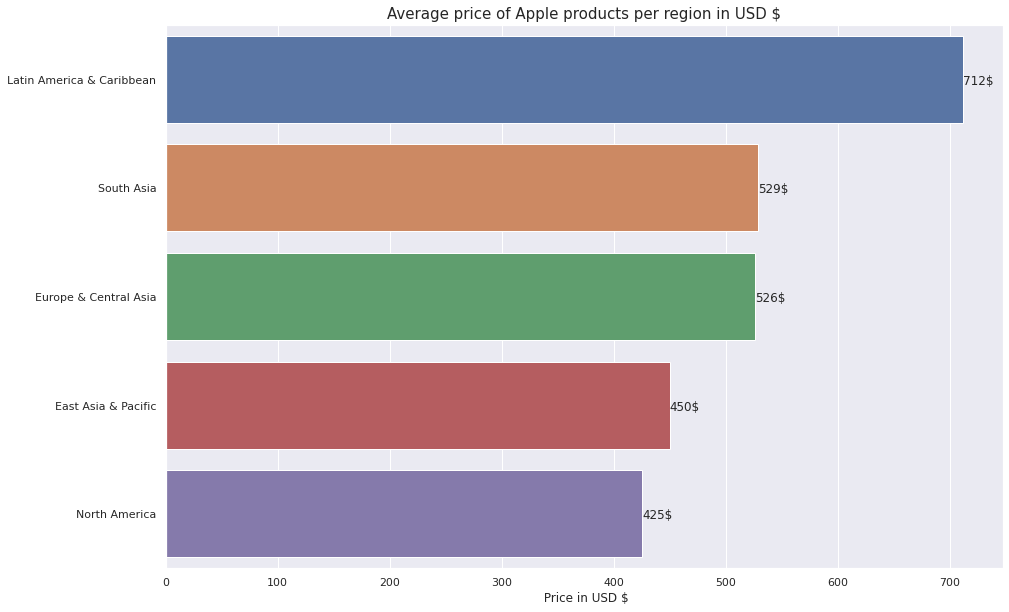

In [35]:
#@title Price per product per country  
Value = "price_usd_3" #@param ["price_usd_3", "ajusted_price","MedianIncome","ajusted_price_daily"]
Group = "region" #@param ["country", "region", "income group"]

if Value == "price_usd_3" :
  title = " Price in USD $"
  titles = "Average price of Apple products per {} in USD $".format(Group)
  num = 3
  symbol = "$"
elif Value == "ajusted_price" :
  titles = title = "Average price of Apple products per {} as percentage of National Monthly Median Income (in USD $)".format(Group)
  title = " Price as a percentage of National Monthly  Median Income (%)"
  num = 5
  symbol ="%"
elif Value == "ajusted_price_daily":
  titles = title = "Average price of Apple products per {}  as number of daily wages ".format(Group)
  title = "Price as number of daily wages "
  num = 6
  symbol ="days"
elif Value == "MedianIncome" and Group == "country":
  titles = "Monthly  Median Income in USD $ per country "
  title = "Monthly  Median Income in USD $"
  num = 4 
  symbol = "$"
else:
  num = 4
  symbol = "$"
  titles = "Average Monthly  Median Income per {} in USD $ ".format(Group)
  title = "Average Monthly  Median Income in USD $"


data = df.groupby(Group).mean().reset_index().sort_values(by=Value,ascending=False)


plot=sns.barplot(data=data, y= Group, x= Value, orient="h",  ci=None )

for i in range(len(data)):
  plot.text(data.iloc[i,num],
            i,
            str(round(data.iloc[i,num])) +symbol ,
            verticalalignment='center_baseline', 
            fontdict={"fontsize":12  })


plt.title(titles, fontdict={"fontsize":15})
plot.set(ylabel = Group , xlabel= title )
plt.ylabel("")


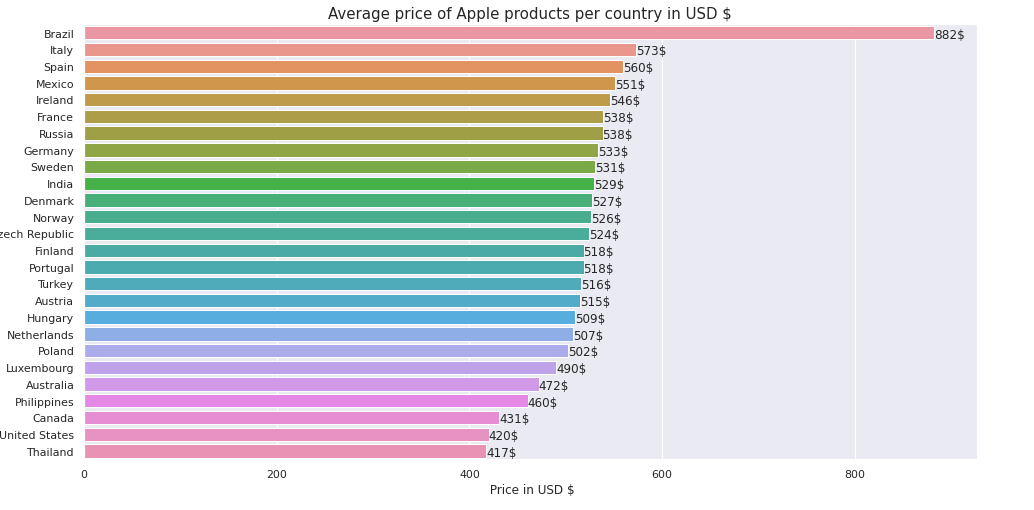

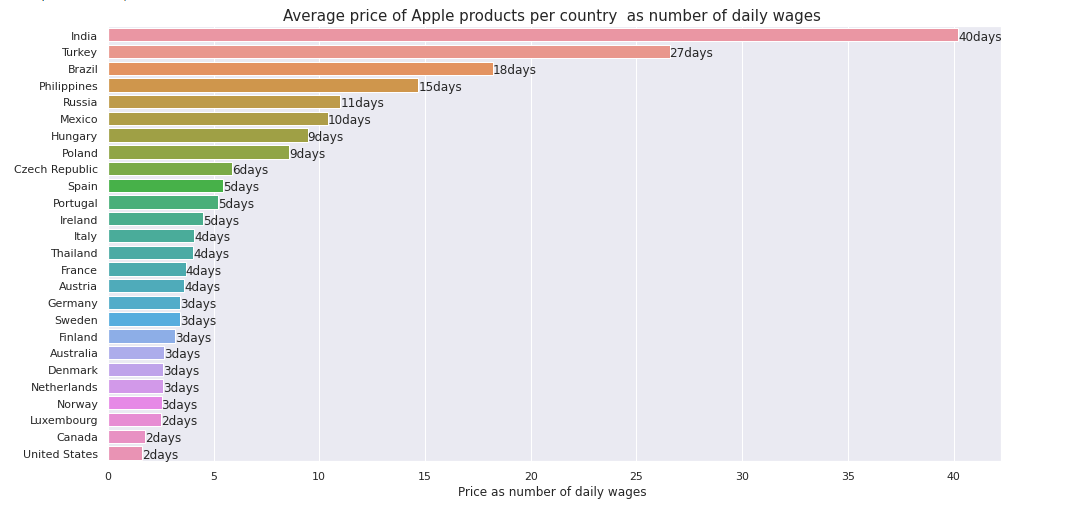

**Average price in US $** :

Brazil has the highest prices for Apple products. On average 882$ per product.

Italy and Spain lead the European market.

The USA, Canada, Thailand and Philippines are the cheapest places to buy Apple products. 

**Average price internationally** :

US dollars is a good way to compare prices internationally. Now let's see through the eyes each person buying in their country. 

*How many days will I need to work in order to own an Apple?*

I live in Portugal, here an average wager can buy an Apple product with around 5 days of work. 

But I was born in Brazil. There, an average wager needs around 18 days of work.

I look a bit like I'm from India, but I'm not. If I was living in India, making a median income, one month would not be enough.

In this sample, prices seem to be higher in Latin America but harder to buy in South Asia where it costs on average 134% of a National monthly median income.


Philippines has some of the lowest prices but is one of the hardest countries to buy Apple products from a worker point of view. 

#Viz data as difference from USD

In [36]:

pivot_T = df.pivot_table( index= "model_en",columns = "country", values = "price_usd_3" , aggfunc="max")
pivot_copy = pivot_T.reset_index()
for col in df.country.unique():
  pivot_copy[col] = pivot_copy[col] - pivot_copy["United States"]
df_shifted = pd.melt(pivot_copy, id_vars="model_en")

df_shifted= df_shifted[~df_shifted.country.isin(["All", "United States"])]


In [37]:

pivot_T_ = df.pivot_table( index= "model_en",columns = "country", values = "ajusted_price" , aggfunc="max")
pivot_copy_ = pivot_T_.reset_index()
for col in df.country.unique():
  pivot_copy_[col] = pivot_copy_[col] - pivot_copy_["United States"]
df_shifted_ = pd.melt(pivot_copy_, id_vars="model_en")

df_shifted_= df_shifted_[~df_shifted_.country.isin(["All", "United States"])]


In [38]:

pivot_T_d = df.pivot_table( index= "model_en",columns = "country", values = "ajusted_price_daily" , aggfunc="max")
pivot_copy_d = pivot_T_d.reset_index()
for col in df.country.unique():
  pivot_copy_d[col] = pivot_copy_d[col] - pivot_copy_d["United States"]
df_shifted_d = pd.melt(pivot_copy_d, id_vars="model_en")

df_shifted_d= df_shifted_d[~df_shifted_d.country.isin(["All", "United States"])]


Text(0, 0.5, '')

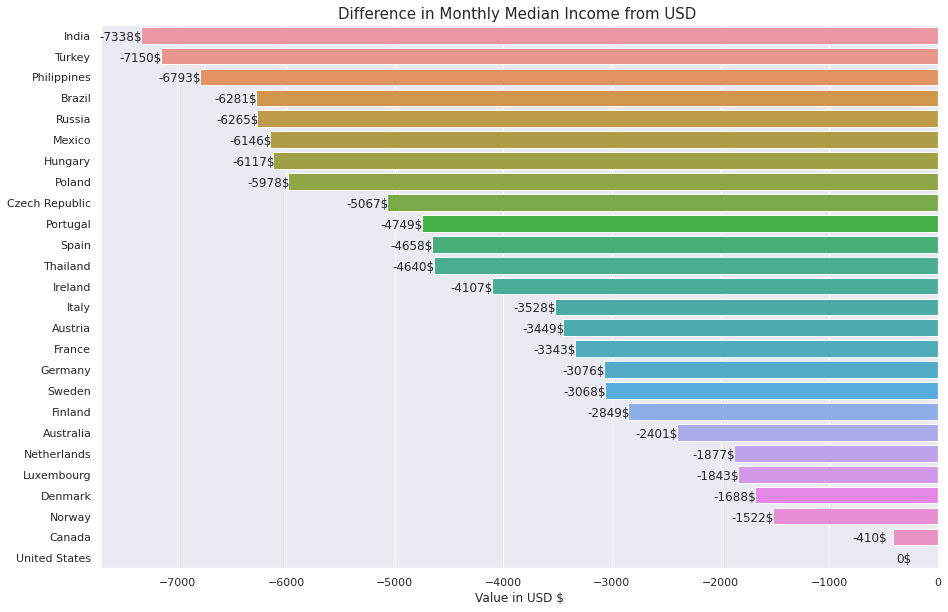

In [39]:
#@title Difference in Monthly Median Income from USD
country_Income_to_us = df.groupby("country").agg({"MedianIncome":"max"}).reset_index()
country_Income_to_us["MedianIncome"] = country_Income_to_us["MedianIncome"] -7733.000000 
country_Income_to_us.sort_values(by="MedianIncome", inplace=True)

plot=sns.barplot(data=country_Income_to_us, y= "country", x= "MedianIncome", orient="h",  ci=None )

for i in range(len(country_Income_to_us.MedianIncome)):
  plot.text(country_Income_to_us.iloc[i,1]-380,
            i,
            str(round(country_Income_to_us.iloc[i,1])) +"$" ,
            verticalalignment='center_baseline', 
            fontdict={"fontsize":12  })

plt.title("Difference in Monthly Median Income from USD ", fontdict={"fontsize":15})

plot.set(ylabel = "Country" , xlabel= "Value in USD $" )
plt.ylabel("")

For each product I have subtrated the corresponded US price. The result is in `df_shifted` in "Long Format" With 3 columns `model_en`, `country` and `value`.


  In Brazil, you pay more 1297 \$ than in the US although Monthly Median Income for Brazilians is  6281 $ lower. (graph above)
  
  The adjusted price is a  bit tricky. This is a measure of how many salaries an "*average*" Brazilian would need to buy a Macbook Air
  
  Instead of comparing $ to Brazilian Real, we can compare a month's works.
  
  An "*average*" Brazilian would need 1.45 times more monthly wages than an American to buy a MacBook Air.
  This is where `ajusted_price_daily` is better. A worker in Brazil needs to work 44 days more than an American to have a MacBook Air

  Also : While a MacBook is cheaper in Thailand than in the US, an average wager has to work a week more than an American to buy one.

Bellow, there are some colorful charts to support the above claims. 

If you copy this notebook you can use all the cells with visualizations to change an input and create your custom chart. The inputs `Model` and `Value` below are dropdown lists; all you have to do is click on a `Model` and re-run the cell. 

I've added charts for iPhone 13, MacBook, and AirPods but there is 14 other Apple product.

If the value is positive -> price is higher than in the US.
If the value is negative -> price is lower than in the US.

Also:
* Only available for countries where there is data for that product.
* Only available for products where there is data in the US.




Text(0, 0.5, '')

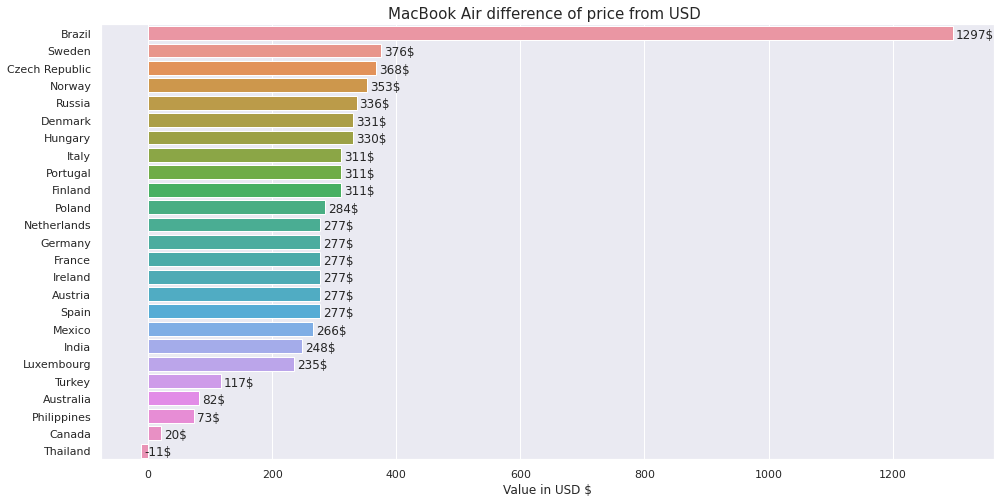

In [40]:
#@title How far is the price from US?
Model = "MacBook Air" #@param ['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3rd generation)',       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil (2nd generation)',       '24-inch iMac', 'MacBook Air', 'Magic Mouse']
Value = "price_usd_3" #@param ["price_usd_3","ajusted_price","ajusted_price_daily"]
sns.set(rc= {"figure.figsize": (16, 8)})

if Value =="price_usd_3":
  df_shift = df_shifted
  symbol = "$"
  xlabel = "Value in USD $"
  n=5
elif Value =="ajusted_price_daily":
  df_shift = df_shifted_d
  symbol = "days"
  xlabel = "Number of daily wages"
  n=0.5
else:
  df_shift = df_shifted_
  symbol = "%"
  xlabel = "Value in % of Monthly Median Income"
  n=5
var = df_shift.loc[(df_shift.model_en ==Model) & ~(df_shift.value.isna()), "country"].unique()
df_temp =   df_shift[ df_shift.country.isin( var)]


data = df_temp[df_temp.model_en== Model ].sort_values(by="value", ascending = False)



plot=sns.barplot(data=data, y= "country", x= "value", orient="h",  ci=None )

for i in range(len(data.value)):
  plot.text(data.iloc[i,2]+n,
            i,
            str(round(data.iloc[i,2])) + symbol ,
            verticalalignment='center_baseline', 
            fontdict={"fontsize":12  })

plt.title("{} difference of price from USD ".format(Model), fontdict={"fontsize":15})

plot.set(ylabel = "Country" , xlabel= xlabel )
plt.ylabel("")

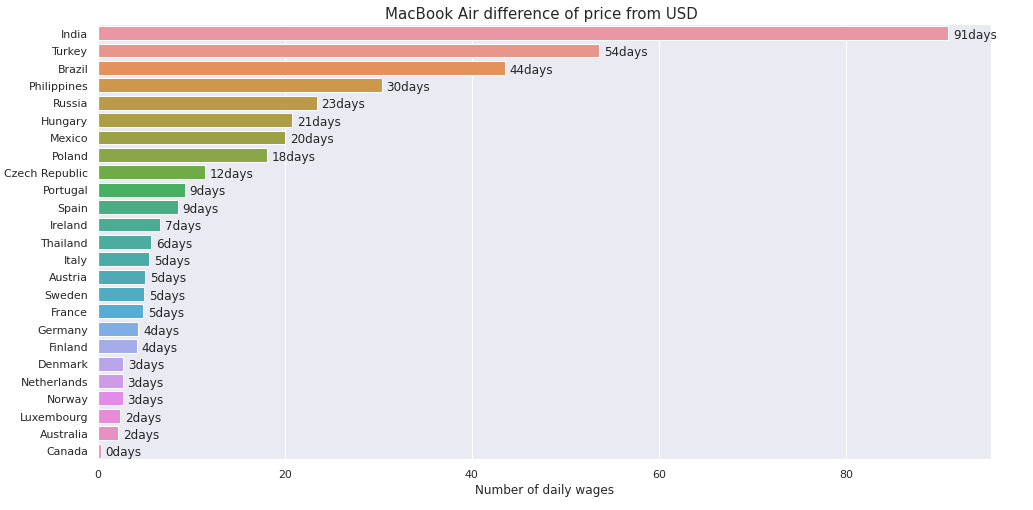

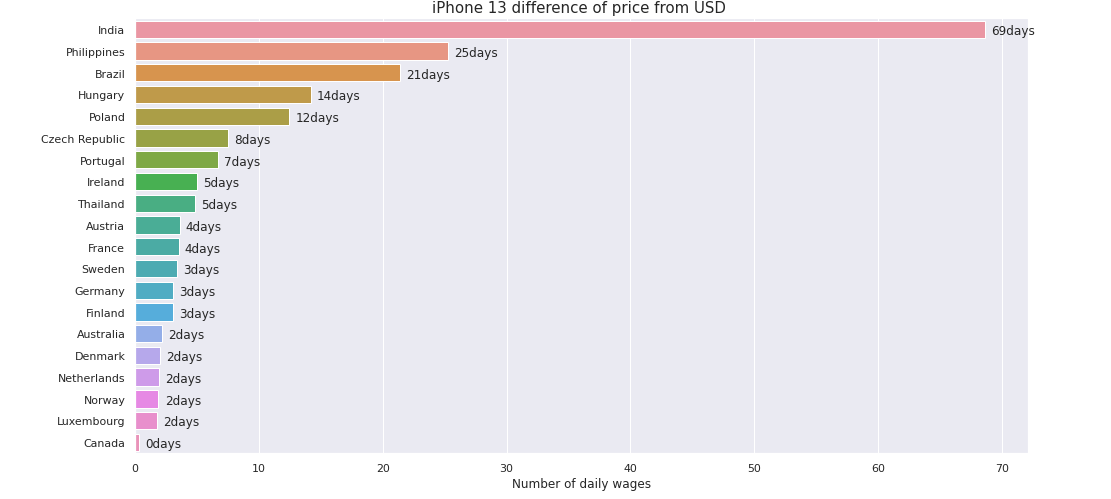

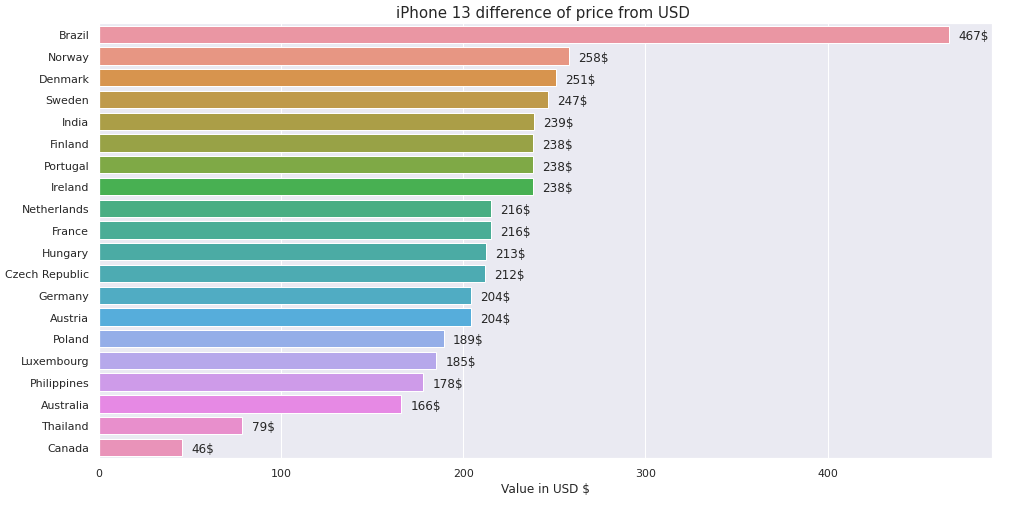

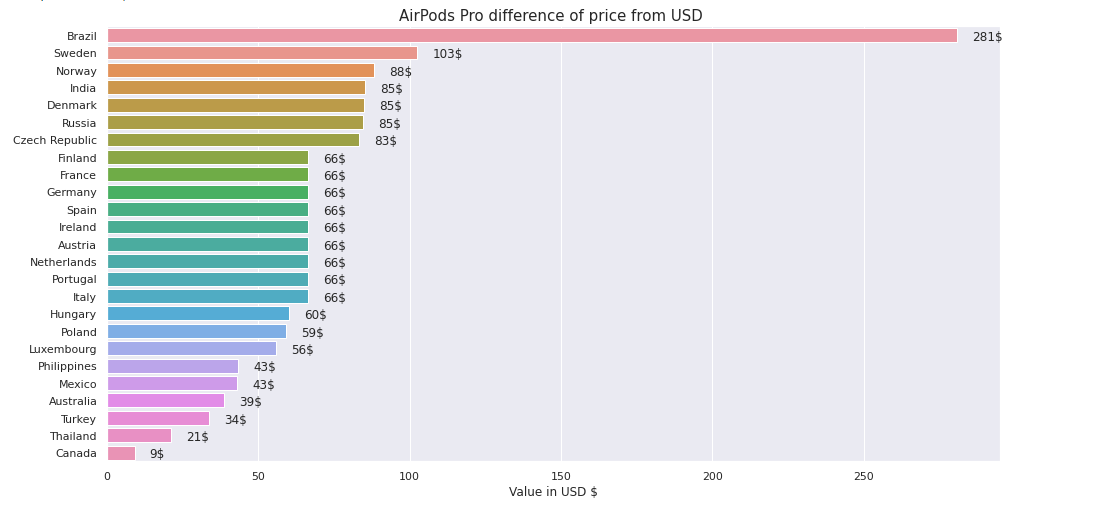

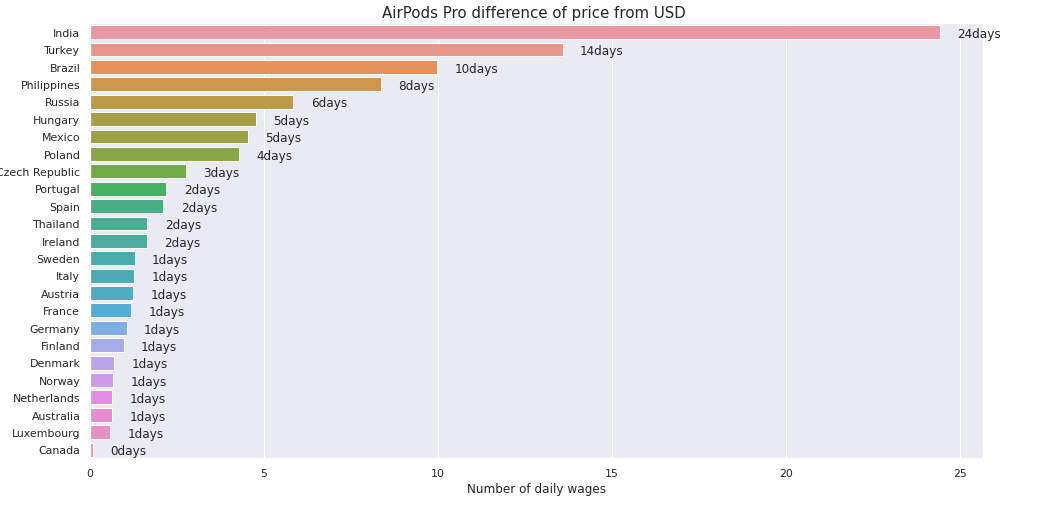